# **GROUP 8 - Solutions to P02**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics
- Rutul Kumar,  , M.Sc Astrophysics

**Deadline:** 31. Oct 2024, 13:00 
_______________________________________________________


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# P03: Point Processes

## Problem 1: Mean and variance of Gaussian random variable

Let us simulate the experiment of measuring a Gaussian random variable with $\mu=0$ and standard deviation $\sigma=1$. Each experiment is a draw from a standard normal.

(i) Simulate 10 repetitions of this experiment by drawing $n_{\mathrm{samp}}=10$ samples from this distribution.


In [10]:
#Paramters
mu = 0
sigma = 1.0
n_samp = 10
n_reps = 10

# Simulating 10 repetitions of drawing 10 samples
samples = np.random.normal(mu, sigma, (n_reps, n_samp))

samples

array([[-1.31810572e+00, -3.63430885e-01, -1.65944540e+00,
         1.44150136e+00, -3.00220735e-01, -9.25370744e-01,
        -3.79700600e-01, -7.70800446e-01,  6.84322891e-01,
         1.48603897e-01],
       [-6.66828431e-02, -1.22632289e+00, -1.66692526e-01,
         1.19438604e+00,  9.50539053e-02,  1.25240087e+00,
         9.94676843e-01,  1.52016458e+00,  6.76790738e-01,
        -1.96000696e-01],
       [ 3.16765465e-01, -7.48218629e-01,  1.02785014e+00,
         5.98078494e-01, -3.95539249e-01,  5.95512007e-02,
         1.49606776e-01, -1.51644153e-01, -4.41709016e-01,
         9.26220326e-02],
       [ 6.06134746e-01,  8.69769189e-01,  2.75526960e-01,
        -8.72063995e-01,  5.09963185e-01,  9.36267579e-01,
        -1.17347836e+00, -4.72681303e-04,  4.80648814e-02,
        -1.82011344e+00],
       [-8.94053178e-01,  7.79061830e-01,  1.19884740e+00,
        -1.12624170e+00,  9.24790201e-01,  3.43756435e-01,
         4.95333701e-01,  6.77939474e-01, -3.76808156e-02,
        -4.

(ii) Use `numpy` routines to estimate the mean and the variance of the samples. For the variance, use the trivial but biased estimator as well as the unbiased one.

In [7]:
# Calculating the mean and the variance
sample_means = np.mean(samples, axis=1)
variances_biased = np.var(samples, axis=1) # biased variance
variance_unbiased = np.var(samples, axis=1, ddof=1) # unbiased variance

sample_means

array([ 0.00194477, -0.38152679,  0.22910277, -0.25392831,  0.16182735,
       -0.08823023,  0.52892586, -0.34645837,  0.22556631,  0.17361332])

## Problem 2: Distribution of sample mean

Write a function that repeats problem 1 $n$ times.

(i) Using these samples, investigate the distribution of the sample mean. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?



In [11]:
def simulate_samples(n_reps, n_samp):
    # Parameters
    mu = 0
    sigma = 1.0
    
    # Simulating samples
    samples = np.random.normal(mu, sigma, (n_reps, n_samp))
    
    # Calculating means and variances
    sample_means = np.mean(samples, axis=1)
    variances_biased = np.var(samples, axis=1)  # Biased variance
    variances_unbiased = np.var(samples, axis=1, ddof=1)  # Unbiased variance
    
    return sample_means, variances_biased, variances_unbiased

(ii) Using these samples, investigate the bias of the variance estimators. How does it compare to your expectations? How do your conclusions change if you increase the sample size to $n_{\mathrm{samp}}=100$?

In [41]:
def analyze_distribution_and_bias(n_reps, n_samp_list):
    for n_samp in n_samp_list:
        sample_means, variances_biased, variances_unbiased = simulate_samples(n_reps, n_samp)
        
        # (i) Investigate the distribution of the sample mean
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(sample_means, bins=50, density=True, alpha=0.9, color='darkcyan')
        plt.title(f'Distribution of Sample Mean (n_samp={n_samp})')
        plt.xlabel('Sample Mean')
        plt.ylabel('Density')
        
        # Overlaying the expected normal distribution
        x = np.linspace(-4, 4, 100)
        plt.plot(x, (1/(np.sqrt(2 * np.pi))) * np.exp(-x**2 / 2), color='red', lw=2)
        
        # (ii) Investigate bias of variance estimators
        plt.subplot(1, 2, 2)
        plt.hist(variances_biased, bins=50, alpha=1, color='blue', label='Biased Variance')
        plt.hist(variances_unbiased, bins=50, alpha=1, color='darkorange', label='Unbiased Variance')
        plt.title(f'Variance Estimators (n_samp={n_samp})')
        plt.xlabel('Variance Value')
        plt.ylabel('Frequency')
        plt.axvline(x=sigma**2, color='k', linestyle='dashed', linewidth=2)  # True variance line
        plt.legend()
        
        plt.tight_layout()
        plt.show()


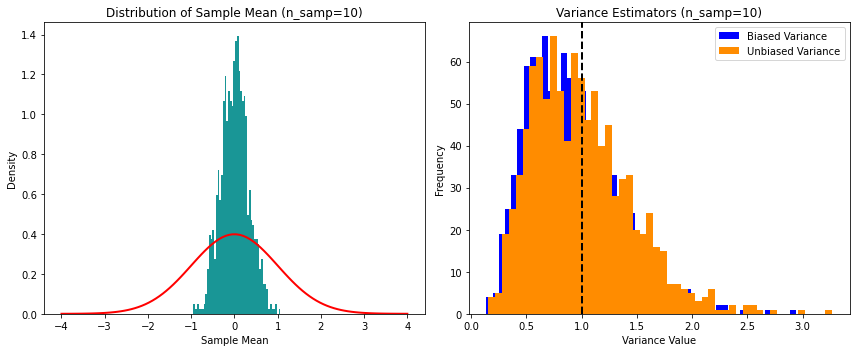

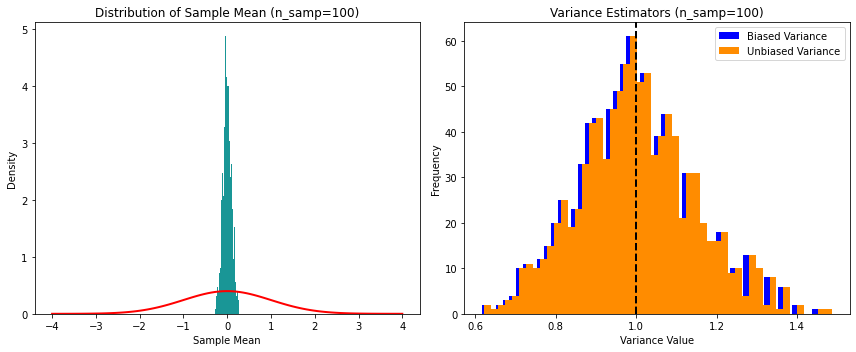

In [42]:
# Running the analysis for different sample sizes (1000 experiments), with 10 and 100 samples
analyze_distribution_and_bias(1000, [10, 100])